In [1]:
import pandas as pd
from scipy.stats import norm
import numpy as np

#visual
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [2]:
#Loading the data
df_sourcefile=pd.read_excel("WA_Fn-UseC_-HR-Employee-Attrition.xlsx")#can give sheet_name for sheet in which the data is present
print("Shape of Dataframe is: " + format(df_sourcefile.shape))

Shape of Dataframe is: (1470, 35)


In [3]:
#copying the data
df_HR=df_sourcefile.copy()

In [4]:
#Pandas dataframe.info() function is used to get a concise summary of the dataframe.
#It comes really handy when doing exploratory analysis of the data. 
df_HR.info() #Check for missing values


# The data provided has no missing values.
# In HR Analytics, employee data is unlikely to feature large ratio of missing values
# as HR Departments typically have all personal and employment data on-file.
# However, the type of documentation data is being kept in (i.e. whether it is paper-based, Excel spreadhsheets, databases, etc)
# has a massive impact on the accuracy and the ease of access to the HR data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
df_HR.columns #column names in a list

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df_HR.head() #displays first 5 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
#The dataset contains several numerical and categorical columns
#providing various information on employee's personal and employment details.

#df_HR.columns.to_series().groupby(df_HR.dtypes).groups
df_HR.columns.groupby(df_HR.dtypes)

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

In [8]:
df_HR.describe() #describe(include='all') to display categorical data as well

#used to view some basic statistical details like percentile, mean, std etc.
#of a data frame or a series of numeric values. When this method is applied to a series of string,
#it returns a different output which is shown below.


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


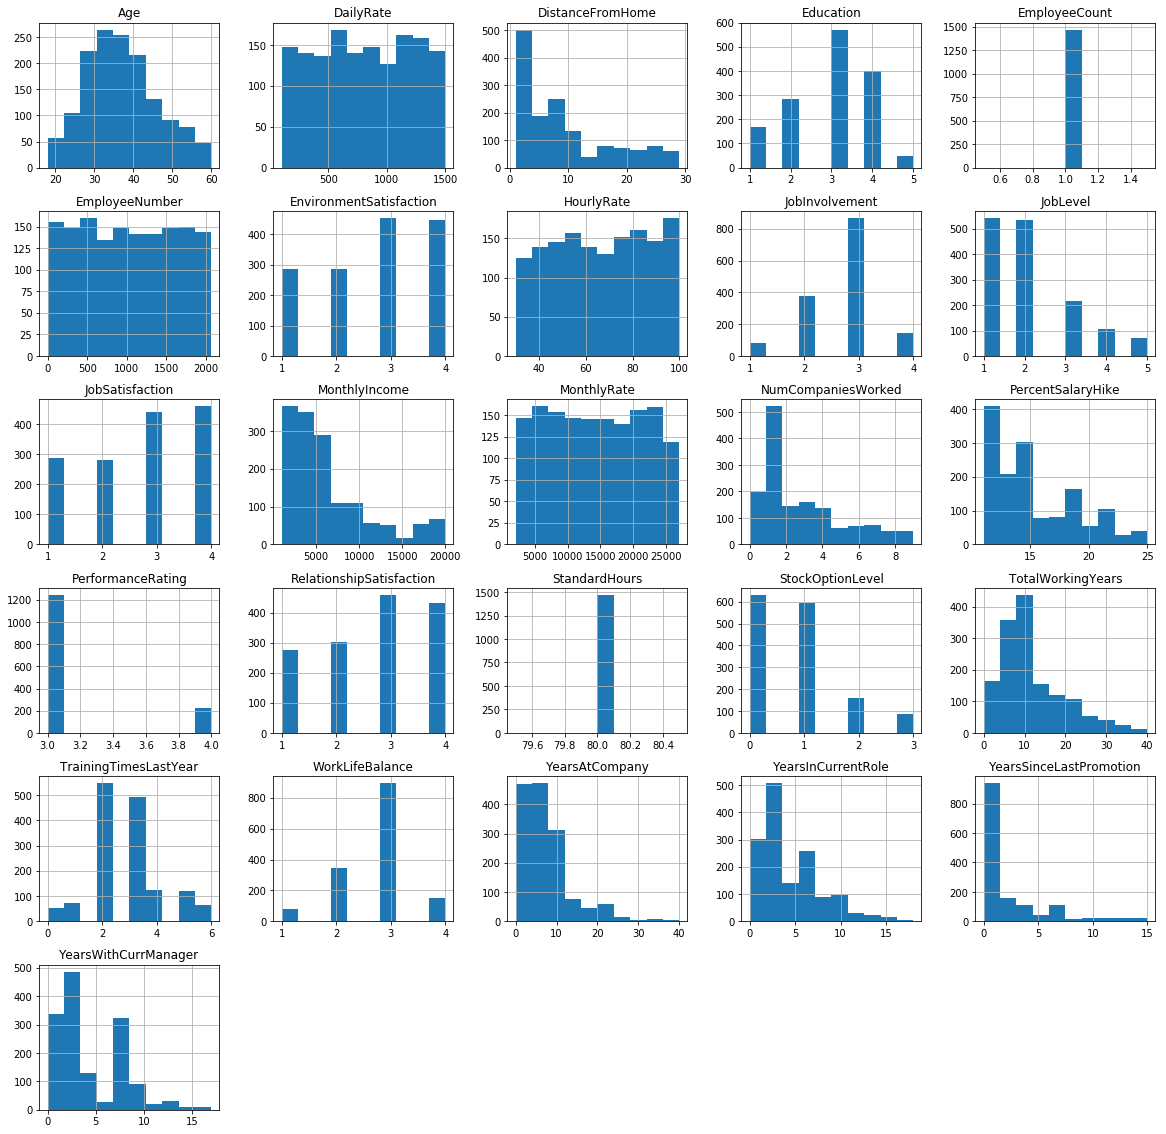

In [9]:
df_HR.hist(figsize=(20,20)) #figsize to increase the size if the figure. Graphs are only for numerical values
plt.show()
#sns.catplot can pe used to plot categorical data


In [10]:

# A few observations can be made based on the information and histograms for numerical features:
    
# Many histograms are tail-heavy; indeed several distributions are right-skewed
# (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). 
# Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.
# Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.
# EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.
# Employee Number is likely to be a unique identifier for employees given the feature's quasi-uniform distribution.

In [11]:
#Age

(mu,sigma)=norm.fit(df_HR.loc[df_HR['Attrition']=='Yes','Age'])
print('Ex Employees average age {:.1f} and standard deviation {:.1f}'.format(mu,sigma))
(mu,sigma)=norm.fit(df_HR.loc[df_HR['Attrition']=='No','Age'])
print('Current Employees average age {:.1f} and standard deviation {:.1f}'.format(mu,sigma))

# The average age of ex-employees is 33.6 years old, while 37.6 is the average age for current employees.

Ex Employees average age 33.6 and standard deviation 9.7
Current Employees average age 37.6 and standard deviation 8.9


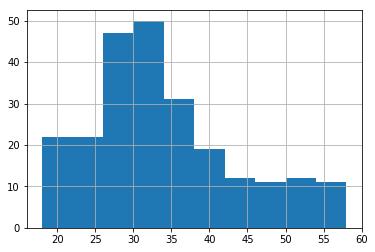

In [12]:
df_HR.loc[df_HR['Attrition']=='Yes','Age'].hist()

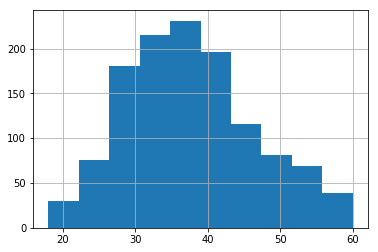

In [13]:
df_HR.loc[df_HR['Attrition']=='No','Age'].hist()

In [14]:
# The age distributions for Active and Ex-employees only differs by one year.

In [15]:
# Let's create a kernel density estimation (KDE) plot colored by the value of the target.
# technique to estimate the unknown probability distiribution of a random variable
# based on sample of points taken from that distribution.
# The kernel functions are typically smooth functions with a single mode at x=0. 
# For example, a Gaussian bell curve is typically used. The smoother the curve (for the Gaussian this means higher variance),
# the more we spread out the evidence: if we observed several points close together,
# we are going to assume all points in that neighborhood are very likely.
# A region where we didn't observe any points in our sample will have a very low density.

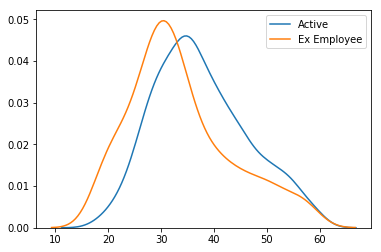

In [16]:
#Choose age with attrition and without attrition
x1=df_HR.loc[df_HR['Attrition']=='No','Age']
x2=df_HR.loc[df_HR['Attrition']=='Yes','Age']

#Create distplot with custom bin_size

sns.kdeplot(x1,label='Active')
sns.kdeplot(x2,label='Ex Employee')
plt.legend()

In [17]:
#Education field
# Several Education Fields are represented in the dataset,
# namely: Human Resources, Life Sciences, Marketing, Medical, Technical Degree, and a miscellaneous category Other.
# Here, I plot the normalized % of Leavers for each Education Field.

In [18]:
#Education field of employees
df_HR['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

,Field,% of Leavers
0,Life Sciences,14.686469
1,Other,13.414634
2,Medical,13.577586
3,Marketing,22.012579
4,Technical Degree,24.242424
5,Human Resources,25.925926


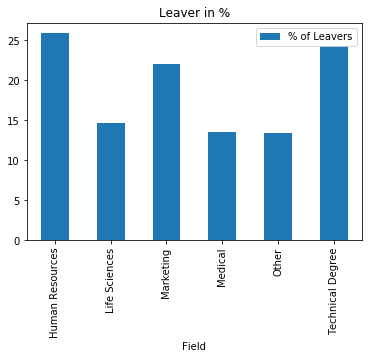

In [19]:
df_EducationField=pd.DataFrame(columns=["Field","% of Leavers"])
i=0
for field in list(df_HR["EducationField"].unique()):
    ratio=df_HR[(df_HR['EducationField']==field) & (df_HR['Attrition']=='Yes')].shape[0]/df_HR[df_HR['EducationField']==field].shape[0]
    df_EducationField.loc[i]=(field,ratio*100)
    i+=1

df_EducationField.groupby('Field').sum().plot(kind='bar',title='Leaver in %')
df_EducationField.head(10)


In [20]:
#Gender
# Gender distribution shows that the dataset features a higher relative proportion of 
# male ex-employees than female ex-employees, with normalised gender distribution 
# of ex-employees in the dataset at 17.0% for Males and 14.8% for Females.

In [21]:
df_HR['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

,Gender,% of Leavers
0,Female,14.795918
1,Male,17.006803


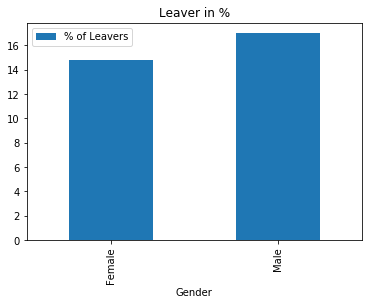

In [22]:
df_GenderField=pd.DataFrame(columns=["Gender","% of Leavers"])
i=0
for field in list(df_HR["Gender"].unique()):
    ratio=df_HR[(df_HR['Gender']==field) & (df_HR['Attrition']=='Yes')].shape[0]/df_HR[df_HR['Gender']==field].shape[0]
    df_GenderField.loc[i]=(field,ratio*100)
    i+=1

df_GenderField.groupby('Gender').sum().plot(kind='bar',title='Leaver in %')

df_GenderField.head()

In [23]:
#Marital Status
# The dataset features three marital status: Married (673 employees), Single (470 employees), Divorced (327 employees).
# Single employees show the largest proportion of leavers at 25%.

In [24]:
df_HR['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

,Status,% Leavers
0,Single,25.531915
1,Married,12.481426
2,Divorced,10.091743


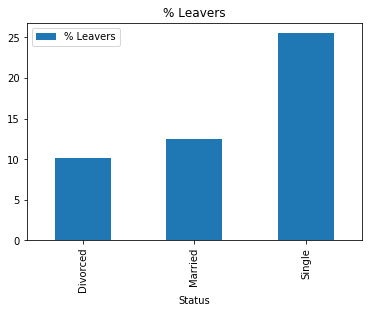

In [25]:
df_MaritalField=pd.DataFrame(columns=['Status','% Leavers'])
i=0
for field in list(df_HR['MaritalStatus'].unique()):
    ratio=df_HR[(df_HR['MaritalStatus']==field)& (df_HR['Attrition']=='Yes')].shape[0]/df_HR[(df_HR['MaritalStatus']==field)].shape[0]
    df_MaritalField.loc[i]=(field,ratio*100)
    i+=1

df_MaritalField.groupby('Status').sum().plot(kind='bar',title='% Leavers')
df_MaritalField.head()


In [26]:
#Distance From Home
# Distance from home for employees to get to work varies from 1 to 29 miles.
# There is no discernable strong correlation between Distance from Home and Attrition Status as per the KDE plot below.

In [27]:
print("min distance" ,format(df_HR['DistanceFromHome'].min()))
print("max distance" ,format(df_HR['DistanceFromHome'].max()))

min distance 1
max distance 29


In [28]:
print("Active",format(df_HR[df_HR['Attrition']=='No']['DistanceFromHome'].mean()))
#df_HR.loc[df_HR['Attrition']=='Yes','DistanceFromHome'].mean()
print("Ex",format(df_HR[df_HR['Attrition']=='Yes']['DistanceFromHome'].mean()))

Active 8.915652879156529
Ex 10.632911392405063


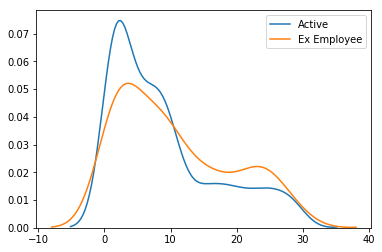

In [29]:
x1=df_HR.loc[df_HR['Attrition']=='No','DistanceFromHome']
x2=df_HR.loc[df_HR['Attrition']=='Yes','DistanceFromHome']

#Create distplot with custom bin_size

sns.kdeplot(x1,label='Active')
sns.kdeplot(x2,label='Ex Employee')
plt.legend()

In [30]:
#Department
# The data features employee data from three departments: Research & Development, Sales, and Human Resources.

In [31]:
df_HR['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

,Department,% Leavers
0,Sales,20.627803
1,Research & Development,13.839750
2,Human Resources,19.047619


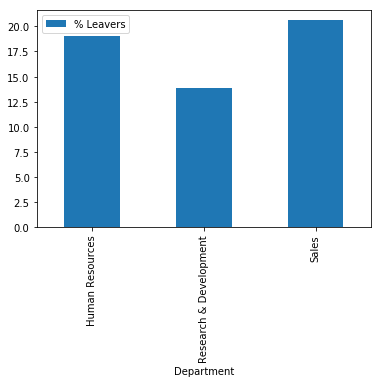

In [32]:
df_DepartmentField=pd.DataFrame(columns=['Department','% Leavers'])
i=0
for field in list(df_HR['Department'].unique()):
    ratio=df_HR[(df_HR['Department']==field) & (df_HR['Attrition']=='Yes')].shape[0]/df_HR[(df_HR['Department']==field)].shape[0]
    df_DepartmentField.loc[i]=(field,ratio*100)
    i+=1
df_DepartmentField.groupby('Department').sum().plot(kind='bar')
df_DepartmentField.head()

In [33]:
# Role and Work Conditions
# A preliminary look at the relationship between Business Travel frequency and 
# Attrition Status shows that there is a largest normalized proportion of Leavers
# for employees that travel "frequently". Travel metrics associated 
# with Business Travel status were not disclosed (i.e. how many hours of Travel is considered "Frequent").

In [34]:
df_HR['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

,Travel,% Leavers
0,Travel_Rarely,14.956855
1,Travel_Frequently,24.909747
2,Non-Travel,8.000000


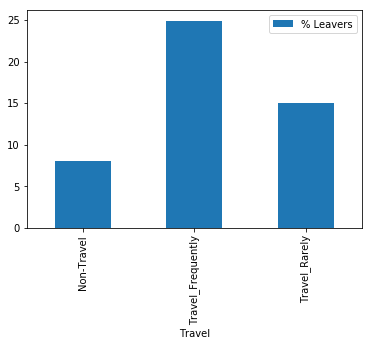

In [35]:
df_TravelField=pd.DataFrame(columns=['Travel','% Leavers'])
i=0
for field in list(df_HR['BusinessTravel'].unique()):
    ratio=df_HR[(df_HR['BusinessTravel']==field) & (df_HR['Attrition']=='Yes')].shape[0]/df_HR[(df_HR['BusinessTravel']==field)].shape[0]
    df_TravelField.loc[i]=(field,ratio*100)
    i+=1
df_TravelField.groupby('Travel').sum().plot(kind='bar')
df_TravelField.head()

In [36]:
#Job Role
# Several Job Roles are listed in the dataset: Sales Executive, Research Scientist, Laboratory Technician,
# Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources.

,Role,% Leavers
0,Sales Executive,17.484663
1,Research Scientist,16.095890
2,Laboratory Technician,23.938224
3,Manufacturing Director,6.896552
4,Healthcare Representative,6.870229


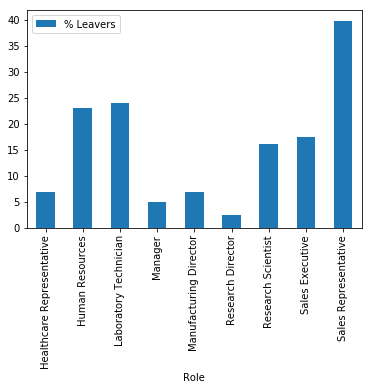

In [37]:
df_HR['JobRole'].value_counts()

df_JobField=pd.DataFrame(columns=['Role','% Leavers'])
i=0
for field in list(df_HR['JobRole'].unique()):
    ratio=df_HR[(df_HR['JobRole']==field) & (df_HR['Attrition']=='Yes')].shape[0]/df_HR[(df_HR['JobRole']==field)].shape[0]
    df_JobField.loc[i]=(field,ratio*100)
    i+=1
df_JobField.groupby('Role').sum().plot(kind='bar')
df_JobField.head()

In [38]:
#Job Role
# Employees have an assigned level within the organisation which varies from 1 (staff) to 5 (managerial/director). 
# Employees with an assigned Job Level of "1" show the largest normalized proportion of Leavers.

,Level,% Leavers
0,2.0,9.737828
1,1.0,26.335175
2,3.0,14.678899
3,4.0,4.716981
4,5.0,7.246377


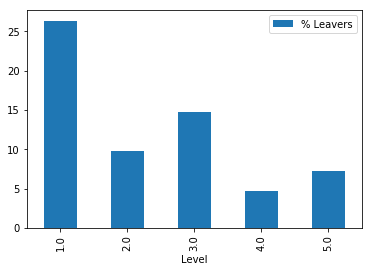

In [39]:
df_HR['JobLevel'].value_counts()

df_LevelField=pd.DataFrame(columns=['Level','% Leavers'])
i=0
for field in list(df_HR['JobLevel'].unique()):
    ratio=df_HR[(df_HR['JobLevel']==field) & (df_HR['Attrition']=='Yes')].shape[0]/df_HR[(df_HR['JobLevel']==field)].shape[0]
    df_LevelField.loc[i]=(field,ratio*100)
    i+=1
df_LevelField.groupby('Level').sum().plot(kind='bar')
df_LevelField.head()

In [40]:
#Job Involvement
# A ranking is associated to the employee's Job Involvement :1 'Low' 2 'Medium' 3 'High' 4 'Very High'.
# The plot below indicates a negative correlation with the Job Involvement of an employee and the Attrition Status.
# In other words, employees with higher Job Involvement are less likely to leave.

,Involvement,% Leavers
0,3.0,14.400922
1,2.0,18.933333
2,4.0,9.027778
3,1.0,33.734940


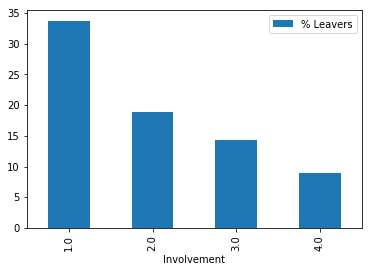

In [41]:
df_HR['JobInvolvement'].value_counts()

df_InvolvementField=pd.DataFrame(columns=['Involvement','% Leavers'])
i=0
for field in list(df_HR['JobInvolvement'].unique()):
    ratio=df_HR[(df_HR['JobInvolvement']==field) & (df_HR['Attrition']=='Yes')].shape[0]/df_HR[(df_HR['JobInvolvement']==field)].shape[0]
    df_InvolvementField.loc[i]=(field,ratio*100)
    i+=1
df_InvolvementField.groupby('Involvement').sum().plot(kind='bar')
df_InvolvementField.head()

In [42]:
#Attrition
df_HR['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [43]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_HR[df_HR['Attrition'] == 'No'].shape[0] / df_HR.shape[0]*100,
    df_HR[df_HR['Attrition'] == 'Yes'].shape[0] / df_HR.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


In [44]:
# As shown on the chart above, we see this is an imbalanced class problem. 
# Indeed, the percentage of Current Employees in our dataset is 83.9% and the percentage of Ex-employees is: 16.1%

# Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. 
# We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

In [45]:
#Correlation
# Let's take a look at some of most significant correlations. 
# It is worth remembering that correlation coefficients only measure linear correlations.

In [46]:
df_HR.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [47]:
df_HR_Trans=df_HR.copy()
df_HR_Trans['Target'] = df_HR_Trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
df_HR_Trans=df_HR_Trans.drop(['Attrition','EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_HR_Trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


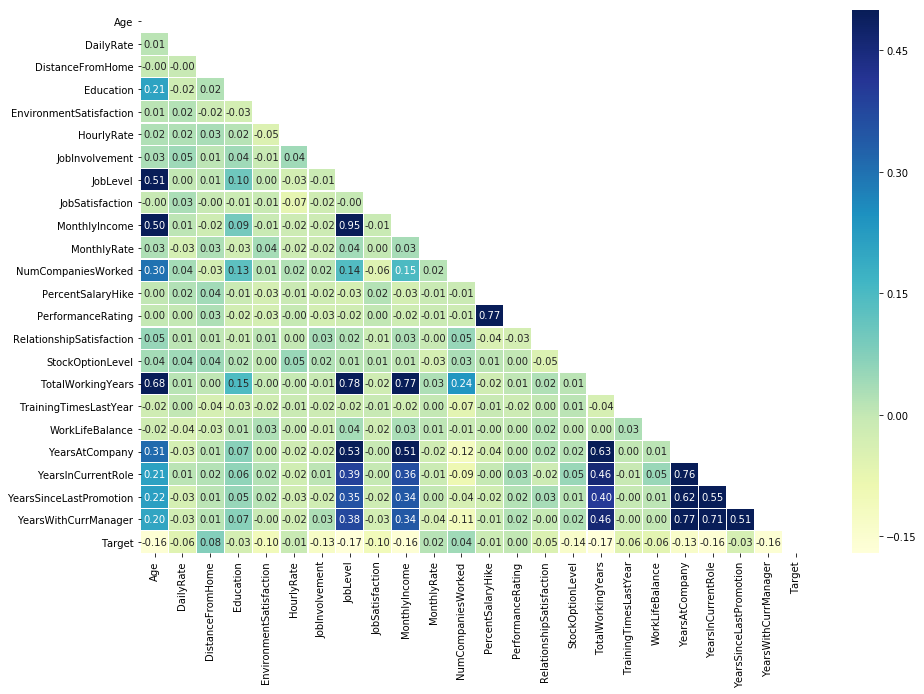

In [48]:
# Let's plot a heatmap to visualize the correlation between Attrition and these factors.


# Calculate correlations
corr = df_HR_Trans.corr()
mask = np.zeros_like(corr) #create a matrix with same shape as corr matrix with 0
mask[np.triu_indices_from(mask)] = True #returns the indices for the upper triangle of the array.
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5, #Set max value for color bar
            mask=mask,
            annot=True, fmt='.2f',
            linewidths=.2, #Set width of the lines that will divide each cell to .2
            cmap="YlGnBu") #Map data values to the coolwarm/YlGnBu color space

In [49]:
# EDA Concluding Remarks
# Let's summarise the findings from this EDA:

# The dataset does not feature any missing or erroneous data values, and all features are of the correct data type.
# The strongest positive correlations with the target features are: Performance Rating, Monthly Rate, Num Companies Worked, Distance From Home.
# The strongest negative correlations with the target features are: Total Working Years, Job Level, Years In Current Role, and Monthly Income.
# The dataset is imbalanced with the majoriy of observations describing Currently Active Employees.
# Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18.
# Other observations include:

# Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts.
# About 10% of leavers left when they reach their 2-year anniversary at the company.
# Loyal employees with higher salaries and more responsbilities show lower proportion of leavers compared to their counterparts.
# People who live further away from their work show higher proportion of leavers compared to their counterparts.
# People who travel frequently show higher proportion of leavers compared to their counterparts.
# People who have to work overtime show higher proportion of leavers compared to their counterparts.
# Employee who work as Sales Representatives show a significant percentage of Leavers in the submitted dataset.
# Employees that have already worked at several companies previously (already "bounced" between workplaces) show higher proportion of leavers compared to their counterparts.

In [50]:
# Machine Learning algorithms can typically only have numerical values as their predictor variables. 
# Hence Label Encoding becomes necessary as they encode categorical labels with numerical values.
# To avoid introducing feature importance for categorical features with large numbers of unique values,
# we will use both Lable Encoding and One-Hot Encoding as shown below.

In [51]:
#Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le=LabelEncoder()

print(df_HR.shape)

df_HR.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [52]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_HR.columns[1:]:
    if df_HR[col].dtype == 'object':
        if len(list(df_HR[col].unique())) <= 2:
            le.fit(df_HR[col])
            df_HR[col] = le.transform(df_HR[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [53]:
# convert rest of categorical variable into dummy
df_HR=pd.get_dummies(df_HR,drop_first=True)


df_HR.head()


df_HR.shape

(1470, 49)

In [54]:
# Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n.
# Machine Learning algorithms perform better when input numerical variables fall within a similar scale.
# In this case, we are scaling between 0 and 5.


In [55]:
#Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,5))
HR_col=list(df_HR.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df_HR[col]=df_HR[col].astype(float)
    df_HR[col]=scaler.fit_transform(df_HR[[col]])
df_HR['Attrition']=pd.to_numeric(df_HR['Attrition'],downcast='float')
df_HR.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [56]:
print('Size of Full Encoded Dataset: {}'. format(df_HR.shape))

Size of Full Encoded Dataset: (1470, 49)


In [57]:
# Prior to implementating or applying any Machine Learning algorithms,
# we must decouple training and testing datasets from our master dataframe.

In [58]:
#Splitting the data
target = df_HR['Attrition'].copy()
df_HR.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df_HR.shape))

Size of Full dataset is: (1470, 44)


In [59]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(df_HR,target,test_size=0.25,random_state=7,stratify=target)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 44)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 44)
Number transactions y_test dataset:  (368,)


In [60]:
# Building Models
# Bseline model
# Let's first use a range of baseline algorithms (using out-of-the-box hyper-parameters) 
# before we move on to more sophisticated solutions. The algorithms considered in this section are: 
# Logistic Regression, Random Forest, SVM, KNN, Decision Tree Classifier, Gaussian NB.

In [61]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [62]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,82.03,8.06,74.49,5.53
2,SVM,78.88,8.21,84.48,4.18
1,Random Forest,78.86,7.01,85.30,3.75
5,Gaussian NB,75.06,5.10,68.14,3.14
3,KNN,66.42,9.90,84.21,4.04
4,Decision Tree Classifier,58.02,6.23,76.22,4.23


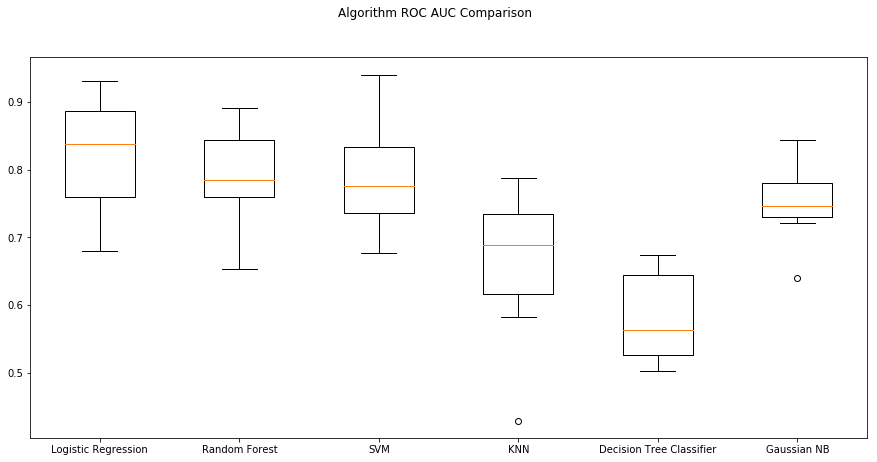

In [63]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

In [64]:
#Logistic Regression
#log = LogisticRegression(random_state=42, penalty='l2')
kfold = model_selection.KFold(n_splits=10, random_state=42)
log = LogisticRegression(solver='liblinear',class_weight="balanced",random_state=42)

# Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

# The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

# Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

# New in version 0.17: class_weight=’balanced’

# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

# ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

# ‘liblinear’ and ‘saga’ also handle L1 penalty

# ‘saga’ also supports ‘elasticnet’ penalty

# ‘liblinear’ does not support setting penalty='none'


log.fit(X_train, y_train)
print(log)
print("coefs:", log.coef_)
print("intercept:", log.intercept_)
y_pred = log.predict(X_test)

print("LR accuracy:", accuracy_score(y_test, y_pred))
print("LR F1:", f1_score(y_test, y_pred))
print("LR CM:\n", confusion_matrix(y_test, y_pred))


scoring = 'roc_auc'
results = model_selection.cross_val_score(log, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))



LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
coefs: [[-0.1316966  -0.02587923  0.22306032 -0.01980895 -0.23812264  0.05631324
  -0.04249228 -0.21086687  0.20539593 -0.19588407 -0.24123416  0.0497334
   0.29945676  0.38173186 -0.12625996  0.08035339 -0.14265424 -0.06176177
  -0.37814862 -0.17772899 -0.18747463  1.18679588 -0.59935465  0.4593271
  -0.48552307  0.31489771  0.17387745  0.16763264  0.39772105 -0.17917777
  -0.11079461 -0.21287283 -0.16800679  0.04092656  0.37836161  0.34466855
  -0.2008525   0.17923572 -0.17216035  0.16134237  0.00573223  0.28350569
   0.06794939  0.22328551]]
intercept: [-0.35416992]
LR accuracy: 0.7527173913043478
LR F1: 0.508108108108108
LR CM:
 [[230  79]
 [ 12  47]]
AUC score (STD): 0.82 (0.08)


In [69]:
probs = log.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.853


In [65]:
#GridSearch
from sklearn.model_selection import GridSearchCV


parameters = {'C' : [0.01, 0.001, 0.05]}


clf_grid = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=parameters,
                      scoring='roc_auc',
                      cv=10)
clf_grid.fit(X_train, y_train)
print(clf_grid)

# return_train_scoreboolean, default=False
# If False, the cv_results_ attribute will not include training scores. 
# Computing training scores is used to get insights on how different parameter settings 
# impact the overfitting/underfitting trade-off. However computing the scores on the 
# training set can be computationally expensive 
# and is not strictly required to select the parameters that yield the best generalization performance.

# iidboolean, default=False
# If True, return the average score across folds, weighted by the number of samples in each test set. 
# In this case, the data is assumed to be identically distributed across the folds,
# and the loss minimized is the total loss per sample, and not the mean loss across the folds.

print("best params: " + str(clf_grid.best_estimator_))
print("best params: " + str(clf_grid.best_params_))
print('best score:', clf_grid.best_score_)

#Predict values based on new parameters
y_pred = clf_grid.predict(X_test)

print("accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred)


scoring = 'roc_auc'
results = model_selection.cross_val_score(clf_grid, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=7,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'C': [0.01, 0.001, 0.05]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)
best params: LogisticRegression(C=0.05, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=7,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
best params: {'C': 0.05}
best score: 0.818021392279991
accuracy: 0.7554347826086957
F1: 0.5108695652173914
AUC score (STD): 0.82 (0.07)


In [66]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=15,
                                n_estimators=100, 
                                criterion='entropy', 
                                random_state=42)
clf_rf.fit(X_train, y_train)
print(clf_rf)
rf_predictions = clf_rf.predict(X_test)
print(confusion_matrix(y_test, rf_predictions))
print("f1:", f1_score(y_test, rf_predictions, average="weighted"))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
[[308   1]
 [ 50   9]]
f1: 0.8172951567694413


In [67]:
print("Accuracy",accuracy_score(y_test, rf_predictions))

Accuracy 0.8614130434782609


In [70]:
probs = clf_rf.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.825


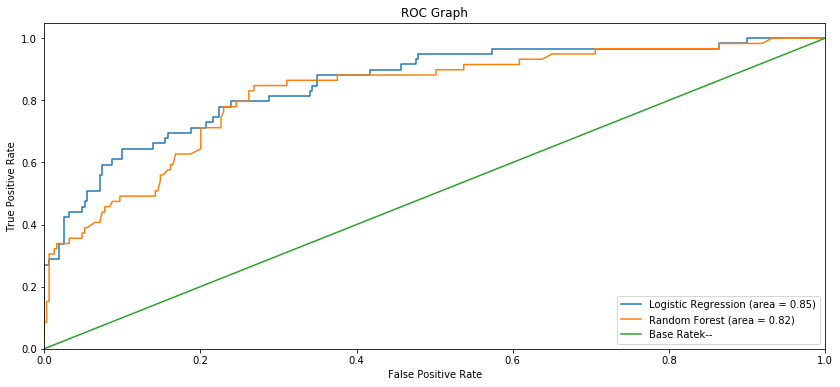

In [71]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, clf_rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()